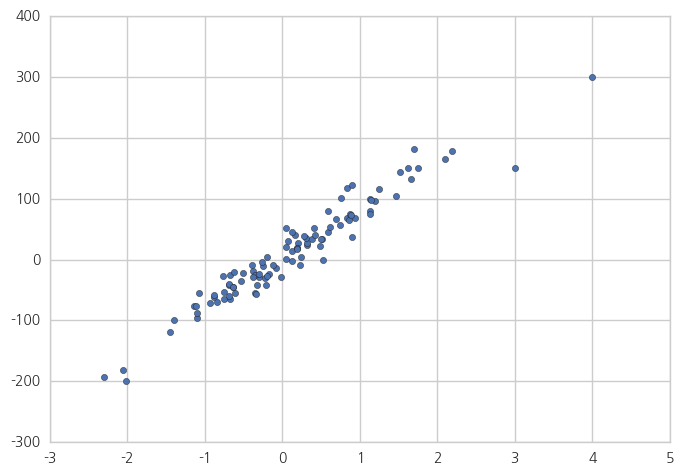

In [1]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20, coef=True, random_state=1)

# add high-leverage points
X0 = np.vstack([X0, np.array([[4],[3]])])
X = sm.add_constant(X0)
y = np.hstack([y, [300, 150]])
plt.scatter(X0, y)
plt.show()

In [2]:
model = sm.OLS(pd.DataFrame(y), pd.DataFrame(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1464.
Date:                Mon, 24 Apr 2017   Prob (F-statistic):           1.61e-61
Time:                        12:21:49   Log-Likelihood:                -452.71
No. Observations:                 102   AIC:                             909.4
Df Residuals:                     100   BIC:                             914.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              3.2565      2.065      1.577      0.1

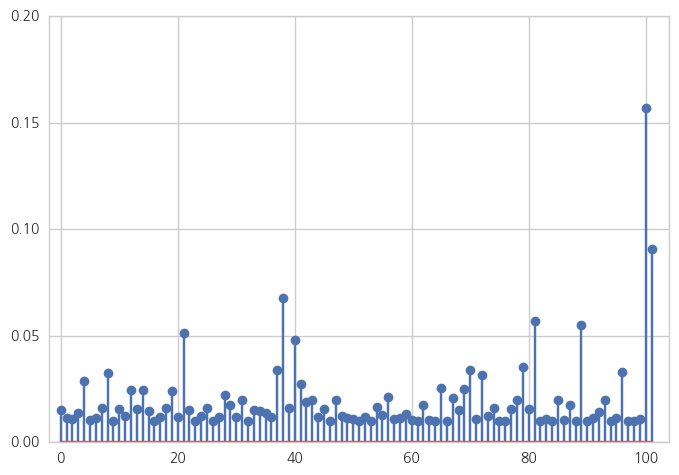

hat.sum() = 2.0


In [3]:
influence = result.get_influence()
hat = influence.hat_matrix_diag
plt.stem(hat)
plt.axis([ -2, len(y)+2, 0, 0.2 ])
plt.show()
print("hat.sum() =", hat.sum())

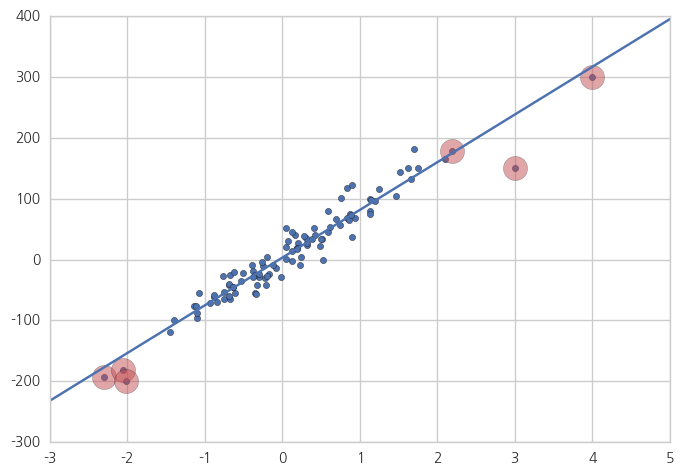

In [4]:
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, ax=plt.gca())

idx = hat > 0.05
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
plt.axis([-3, 5, -300, 400])
plt.show()

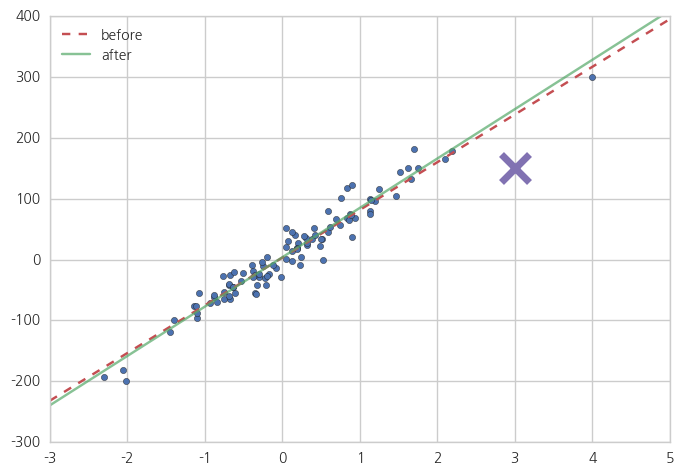

In [5]:
model2 = sm.OLS(y[:-1], X[:-1])
result2 = model2.fit()
plt.scatter(X0, y);
sm.graphics.abline_plot(model_results=result, c="r", linestyle="--", ax=plt.gca())
sm.graphics.abline_plot(model_results=result2, c="g", alpha=0.7, ax=plt.gca())
plt.plot(X0[-1], y[-1], marker='x', c="m", ms=20, mew=5)
plt.axis([-3, 5, -300, 400])
plt.legend(["before", "after"], loc="upper left")
plt.show()

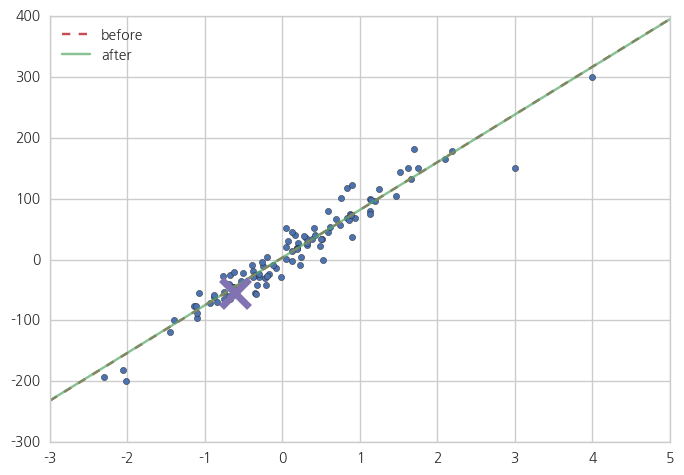

In [6]:
model3 = sm.OLS(y[1:], X[1:])
result3 = model3.fit()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, c="r", linestyle="--", ax=plt.gca())
sm.graphics.abline_plot(model_results=result3, c="g", alpha=0.7, ax=plt.gca())
plt.plot(X0[0], y[0], marker='x', c="m", ms=20, mew=5)
plt.axis([-3, 5, -300, 400])
plt.legend(["before", "after"], loc="upper left")
plt.show()

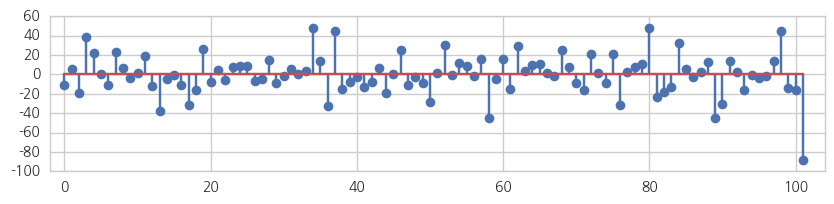

In [7]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid)
plt.xlim([-2, len(y)+2])
plt.show()

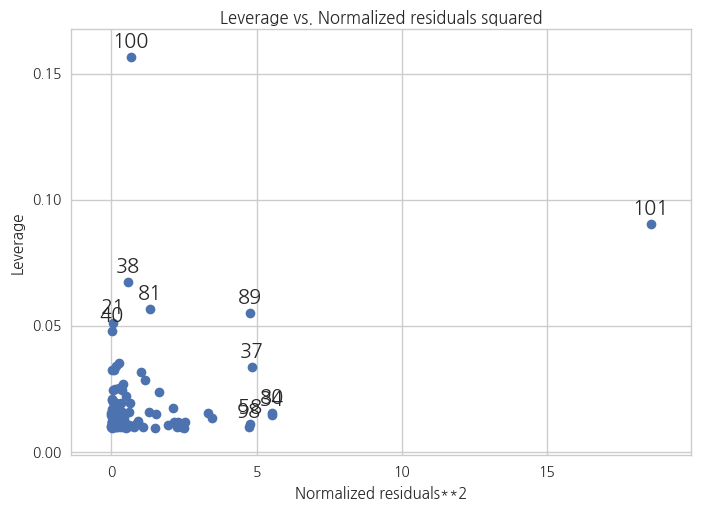

In [8]:
sm.graphics.plot_leverage_resid2(result)
plt.show()

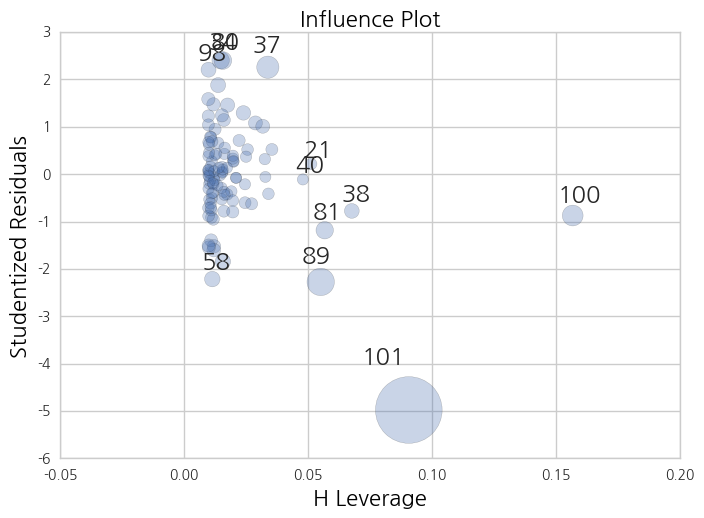

In [9]:
sm.graphics.influence_plot(result, plot_alpha=0.3)
plt.show()

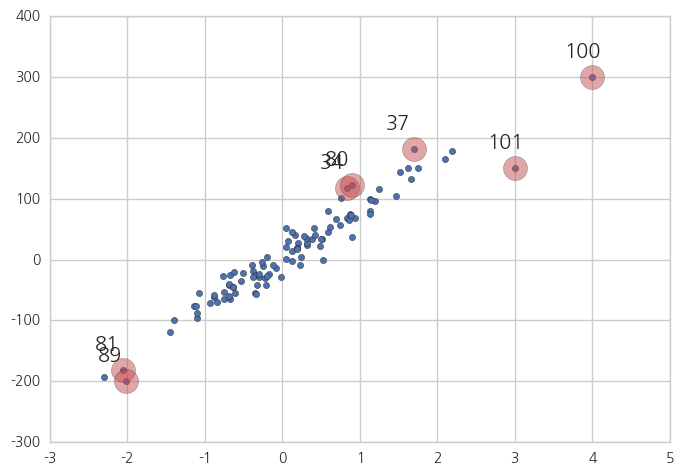

In [10]:
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(y) - 2)
idx = np.where(cooks_d2 > fox_cr)[0]

plt.scatter(X0, y)
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
plt.axis([-3, 5, -300, 400])

from statsmodels.graphics import utils
utils.annotate_axes(range(len(idx)), idx, zip(X0[idx], y[idx]), [(-20,15)]*len(idx), size="large", ax=plt.gca())
plt.show()

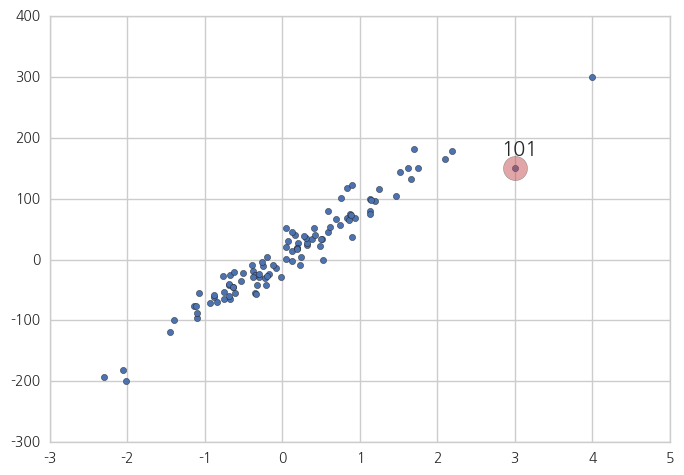

In [11]:
idx = np.nonzero(result.outlier_test().ix[:, -1].abs() < 0.9)[0]
plt.scatter(X0, y)
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
plt.axis([-3, 5, -300, 400]);
utils.annotate_axes(range(len(idx)), idx, zip(X0[idx], y[idx]), [(-10,10)]*len(idx), size="large", ax=plt.gca())
plt.show()

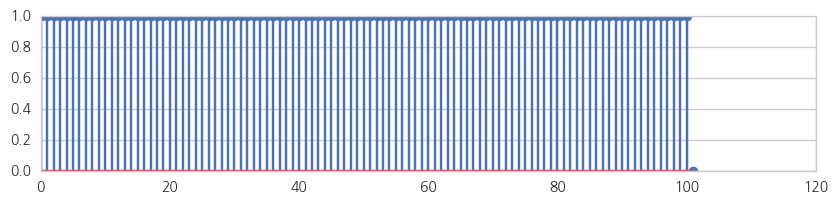

In [12]:
plt.figure(figsize=(10, 2))
plt.stem(result.outlier_test().ix[:, -1])
plt.show()

In [13]:
result.outlier_test().ix[:, -1]

0      1.000000
1      1.000000
2      1.000000
3      1.000000
4      1.000000
5      1.000000
6      1.000000
7      1.000000
8      1.000000
9      1.000000
10     1.000000
11     1.000000
12     1.000000
13     1.000000
14     1.000000
15     1.000000
16     1.000000
17     1.000000
18     1.000000
19     1.000000
20     1.000000
21     1.000000
22     1.000000
23     1.000000
24     1.000000
25     1.000000
26     1.000000
27     1.000000
28     1.000000
29     1.000000
         ...   
72     1.000000
73     1.000000
74     1.000000
75     1.000000
76     1.000000
77     1.000000
78     1.000000
79     1.000000
80     1.000000
81     1.000000
82     1.000000
83     1.000000
84     1.000000
85     1.000000
86     1.000000
87     1.000000
88     1.000000
89     1.000000
90     1.000000
91     1.000000
92     1.000000
93     1.000000
94     1.000000
95     1.000000
96     1.000000
97     1.000000
98     1.000000
99     1.000000
100    1.000000
101    0.000276
Name: bonf(p), dtype: fl

In [14]:
idx = np.nonzero(result.outlier_test().ix[:, -1].abs() < 0.9)[0]
idx

array([101])